# Read and clean the data

We can start by getting an overview of the titanic data and create
a useable dataframe.

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_csv('titanic.csv')
titanic.info()
print(titanic.describe())
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB
       PassengerId     Survived       Pclass          Age        SibSp  \
count  1309.000000  1309.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000     0.377387     2.294882    29.881138     0.498854   
std     378.020061 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have 1309 rows and the mean for the `Survived` feature is `0.337` so only
one third of the number of passengers survived.

- We can already remove the `Name`, `Ticket` and `Cabin` features as they are not
numerical values and don't provide meaningfull values. (Maybe the SibSp and Parch features could also be removed?)

- The `Embarked` and `Fare` features contain in total 3 `NaN` values. We can safely remove these
three rows as this number of row is too low to affect the result of the models.

- The `Age` feature has 263 NaN values. In this case instead of deleting these rows,
we can convert the NaN value to the mean of the age values.

- The only non numerical values are `Embarked` and `Sex`. We can convert the 'S' 'C' and 'Q' values to 0, 1, 2
and `male` `female` to 0 1.
We could create dummies variables with `pandas.get_dummies` function however I don't think it
will make the data easier to manipulate in this case.

After doing these steps we will have a "clean" dataframe.

In [5]:
# remove NaN rows from Embarked and Fare
df = titanic.dropna(subset=['Embarked'])
df = df.dropna(subset=['Fare'])

# Replace NaN age by the mean value
df['Age'].fillna((df['Age'].mean()), inplace=True)

# drop name, ticket and cabin
df = df.drop('Name', axis=1);
df = df.drop('Ticket', axis=1);
df = df.drop('Cabin', axis=1);

# convert Sex to 0 1
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1

# convert Embarked to S=0 C=1 Q=2
df.loc[df['Embarked'] == 'S', 'Embarked'] = 0 
df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2
print(df.shape) # (1306, 9)
df.head()

(1306, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


# KNN

Now that our dataframe is cleaned we can try to apply the k nearest neighbor classifier
to predict the `Survived` label.
We're going to split the dataset to train and test samples with `train_test_split`, apply the knn classifier
to the train dataset and apply the model from the training to the test samples to finally get an accuracy score.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# remove the Survived column to create the features
X = df.drop('Survived', axis=1).values
print(X.shape)

# Only take the Survived values to create the labets
y = df['Survived'].values
print(y.shape) # check the shape has the format (num_value,)

# Split the data into train and test values. Train the classifier to create a model we'll apply on the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test)) # 0.60 :(

knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)
y_pred = knn10.predict(X_test)
knn10.score(X_test, y_test) # 0.63, not the best score?! The defaul n_neighbors value 5 gives a lower score.

(1306, 8)
(1306,)
0.6020408163265306


0.6301020408163265

# Logistic Regression


# Linear Regression

We can try a linear regression by comparing age/fare

In [21]:
# features all except price
features = titanic.drop('Fare', axis=1).values
targets =  titanic['Fare'].values

# take the fifth column only from the features
feature_age = features[:,5]
# If we print the list of ages, we see that we have some missing data (NaN)
print("Inspect the age values to check for existing NaN:")
print(feature_age)


from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# Before applying the fit function to our list of ages we need to crete a 2D array
feature_age = feature_age.reshape(-1, 1)
# We can then fit and transform the data to convert NaN using the mean value
imp.fit(feature_age)
feature_age = imp.transform(feature_age)

# After trying to apply a regression, an "NaN" error occurs linked to the target
# So we can also use the mean value for the target
targets = targets.reshape(-1, 1)
imp.fit(targets)
targets = imp.transform(targets)
print("Check Fare values have the correct shape:")
print(targets)

Inspect the age values to check for existing NaN:
[22.0 38.0 26.0 ... 38.5 nan nan]
Check Fare values have the correct shape:
[[ 7.25  ]
 [71.2833]
 [ 7.925 ]
 ...
 [ 7.25  ]
 [ 8.05  ]
 [22.3583]]


We can now start plotting

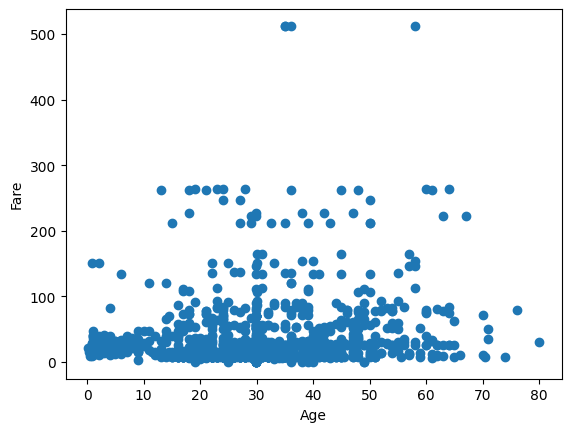

In [22]:
plt.scatter(feature_age, targets)
plt.ylabel('Fare')
plt.xlabel('Age')
plt.show()

From the plotting we can see that we don't have a clear correlation between the ages and the fares.

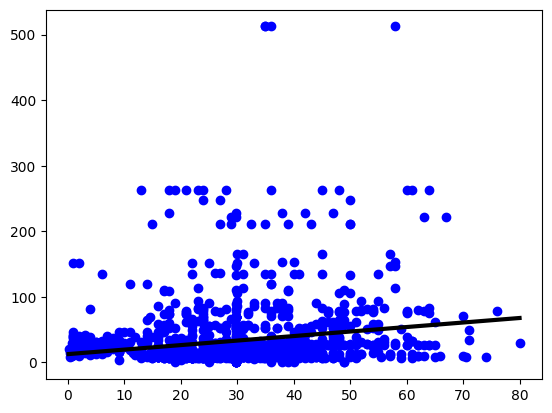

In [23]:
model = LinearRegression()
model.fit(feature_age, targets)
prediction_space = np.linspace(min(feature_age), max(feature_age)).reshape(-1,1)
plt.scatter(feature_age, targets, color='blue')
plt.plot(prediction_space, model.predict(prediction_space),
         color='black', linewidth=3)
plt.show()

So the linear regression applied to age/fare is not really working in this case

Inspect the age values to check for existing NaN:
[7.25 71.2833 7.925 ... 7.25 8.05 22.3583]
Check class values have the correct shape:
[[3.]
 [1.]
 [3.]
 ...
 [3.]
 [3.]
 [3.]]


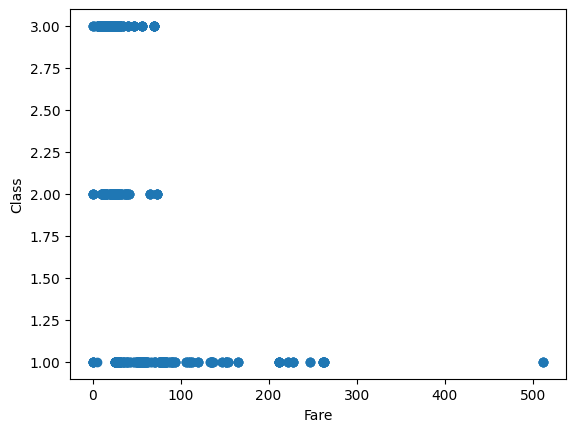

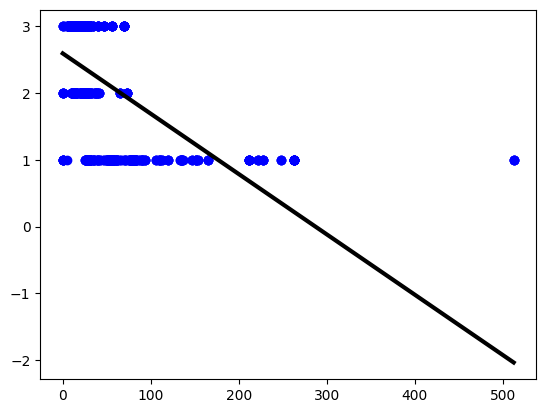

In [24]:
# features all except price
features = titanic.drop('Pclass', axis=1).values
targets =  titanic['Pclass'].values

# take the fare
feature_fare = features[:,8]
# If we print the list of ages, we see that we have some missing data (NaN)
print("Inspect the age values to check for existing NaN:")
print(feature_fare)


from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# Before applying the fit function to our list of ages we need to crete a 2D array
feature_fare = feature_fare.reshape(-1, 1)
# We can then fit and transform the data to convert NaN using the mean value
imp.fit(feature_fare)
feature_fare = imp.transform(feature_fare)

# After trying to apply a regression, an "NaN" error occurs linked to the target
# So we can also use the mean value for the target
targets = targets.reshape(-1, 1)
imp.fit(targets)
targets = imp.transform(targets)
print("Check class values have the correct shape:")
print(targets)

plt.scatter(feature_fare, targets)
plt.ylabel('Class')
plt.xlabel('Fare')
plt.show()

model = LinearRegression()
model.fit(feature_fare, targets)
prediction_space = np.linspace(min(feature_fare), max(feature_fare)).reshape(-1,1)
plt.scatter(feature_fare, targets, color='blue')
plt.plot(prediction_space, model.predict(prediction_space),
         color='black', linewidth=3)
plt.show()

We can see the linear regression between the fare and the class

Logistic Regression

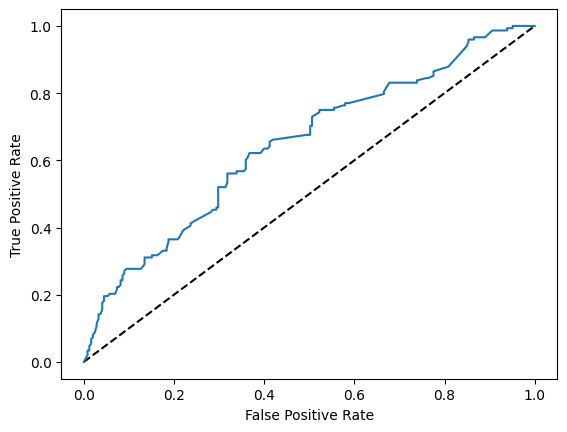

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# features all except price
features = titanic.drop('Survived', axis=1).values
targets =  titanic['Survived'].values

# take the fare
feature_fare = features[:,8]


from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
feature_fare = feature_fare.reshape(-1, 1)
imp.fit(feature_fare)
feature_fare = imp.transform(feature_fare)

# targets = targets.reshape(-1, 1)
# imp.fit(targets)
# targets = imp.transform(targets)

X_train, X_test, y_train, y_test = train_test_split(feature_fare, targets, test_size=0.3,
                                                    random_state=42, stratify=targets)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred[:20]


#define metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()